In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.linear_model import LinearRegression,SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import RandomizedSearchCV


In [36]:
df=pd.read_csv('data/stud.csv')

# Preparing X and Y variables

In [22]:
X=df.drop('math_score',axis=1)
X

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75
...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,99,95
996,male,group C,high school,free/reduced,none,55,55
997,female,group C,high school,free/reduced,completed,71,65
998,female,group D,some college,standard,completed,78,77


In [23]:
y=df['math_score']

In [24]:
# Create Column Transformer with 3 types of transformers
num_features = [i for i in X.columns if X[i].dtype!='object']
cat_features = [i for i in X.columns if X[i].dtype=='object']

print(f"List of numerical features in dataset, {num_features}")
print(f"List of categorical features in dataset, {cat_features}")

List of numerical features in dataset, ['reading_score', 'writing_score']
List of categorical features in dataset, ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


# Applying Label Encoding on Categorical features

In [25]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

for i in cat_features:
    X[i]=LE.fit_transform(X[i])

X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,0,1,1,1,1,72,74
1,0,2,4,1,0,90,88
2,0,1,3,1,1,95,93
3,1,0,0,0,1,57,44
4,1,2,4,1,1,78,75


In [26]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X1=X.copy()
X1=std.fit_transform(X1)
X1[:20]

array([[-0.96462528, -1.01504393, -0.81264039,  0.74188112,  0.74674788,
         0.19399858,  0.39149181],
       [-0.96462528, -0.15044092,  0.82795259,  0.74188112, -1.33914006,
         1.42747598,  1.31326868],
       [-0.96462528, -1.01504393,  0.28108826,  0.74188112,  0.74674788,
         1.77010859,  1.64247471],
       [ 1.03667198, -1.87964693, -1.35950471, -1.34792485,  0.74674788,
        -0.83389925, -1.58374436],
       [ 1.03667198, -0.15044092,  0.82795259,  0.74188112,  0.74674788,
         0.60515772,  0.45733301],
       [-0.96462528, -1.01504393, -1.35950471,  0.74188112,  0.74674788,
         0.94779033,  0.65485663],
       [-0.96462528, -1.01504393,  0.82795259,  0.74188112, -1.33914006,
         1.77010859,  1.57663351],
       [ 1.03667198, -1.01504393,  0.82795259, -1.34792485,  0.74674788,
        -1.79327056, -1.91295038],
       [ 1.03667198,  0.71416208, -0.26577606, -1.34792485, -1.33914006,
        -0.35421359, -0.06939663],
       [-0.96462528, -1.0150

In [27]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X1,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 7), (200, 7))

### Create an Evaluate Function to give all metrics after model Training

In [28]:

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [29]:
models = {
    "Linear Regression": LinearRegression(),
    "SGDRegressor": SGDRegressor(),
    "SVM": SVR(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.5876
- Mean Absolute Error: 4.4947
- R2 Score: 0.8615
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3175
- Mean Absolute Error: 4.1301
- R2 Score: 0.8838


SGDRegressor
Model performance for Training set
- Root Mean Squared Error: 5.5946
- Mean Absolute Error: 4.4959
- R2 Score: 0.8612
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3162
- Mean Absolute Error: 4.1318
- R2 Score: 0.8839


SVM
Model performance for Training set
- Root Mean Squared Error: 7.0186
- Mean Absolute Error: 5.2583
- R2 Score: 0.7815
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 8.6233
- Mean Absolute Error: 5.8131
- R2 Score: 0.6944


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.6548
- Mean Absolute Error: 4.5810
- R2 Score: 0.8582
------------------

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 2.2853
- Mean Absolute Error: 1.8361
- R2 Score: 0.9768
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0662
- Mean Absolute Error: 4.7020
- R2 Score: 0.8488


Gradient Boosting Regressor
Model performance for Training set
- Root Mean Squared Error: 4.6774
- Mean Absolute Error: 3.7671
- R2 Score: 0.9030
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5405
- Mean Absolute Error: 4.2847
- R2 Score: 0.8739


AdaBoost Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7949
- Mean Absolute Error: 4.7577
- R2 Score: 0.8511
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.0099
- Mean Absolute Error: 4.6854
- R2 Score: 0.8516




## Results

In [30]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
1,SGDRegressor,0.883858
0,Linear Regression,0.883803
6,Gradient Boosting Regressor,0.873852
7,AdaBoost Regressor,0.851569
5,Random Forest Regressor,0.848775
3,K-Neighbors Regressor,0.782666
4,Decision Tree,0.725917
2,SVM,0.694414


# Linear Regression

In [31]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 88.38


# Plot y_pred and y_test

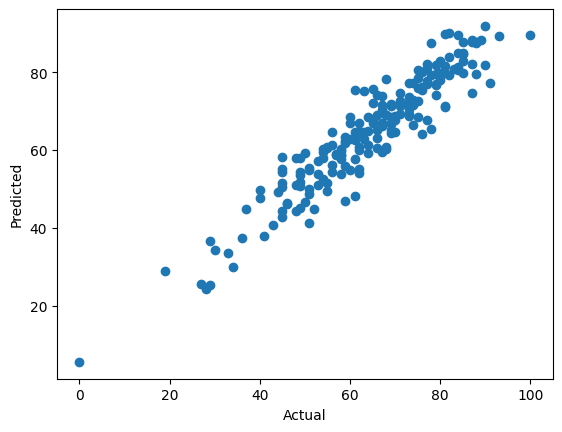

In [32]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

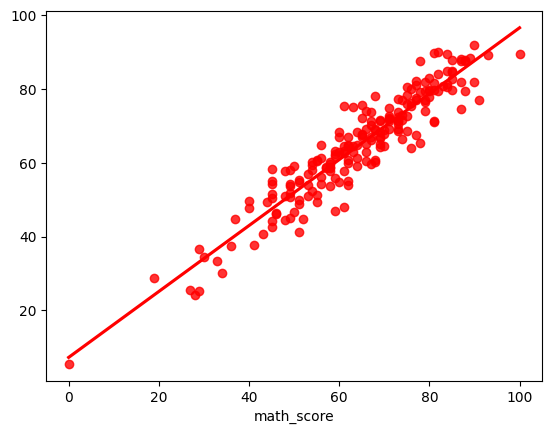

In [33]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

## Difference between Actual and Predicted Values

In [34]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,77.118557,13.881443
737,53,57.073580,-4.073580
740,80,79.357668,0.642332
660,74,77.150932,-3.150932
411,84,84.912837,-0.912837
...,...,...,...
408,52,44.903648,7.096352
332,62,59.926534,2.073466
208,74,66.529192,7.470808
613,65,67.953852,-2.953852
